In [37]:
import pandas as pd
import pandas as pd
import numpy as np
import talib as ta
import pyfinance as pn
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("/content/AAPL_historical_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [18]:
(data['Dividends'] == 0).sum()

10915

In [19]:
(data['Stock Splits'] == 0).sum()

10993

In [16]:
len(data)

10998

The values of column Dividends and Srock Splits are zero

In [25]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


## **Descriptive Statistics**
- **SMA (Simple Moving Average):** Average of closing prices over a period; shows trend direction.  
- **EMA (Exponential Moving Average):** Weighted average emphasizing recent prices; reacts faster to changes.  
- **RSI (Relative Strength Index):** Measures price momentum; values >70 = overbought, <30 = oversold.

In [34]:
data_close = np.array(data["Close"]).flatten()

# Calculate moving averages
data["SMA_20"] = ta.SMA(data_close, timeperiod=20)
data["EMA_50"] = ta.EMA(data_close, timeperiod=50)
# Calculate RSI
data["RSI_14"] = ta.RSI(data_close, timeperiod=14)
# Display the updated DataFrame with indicators
data[['Close', 'SMA_20', 'EMA_50','RSI_14']].tail()

,Close,SMA_20,EMA_50,RSI_14
10993,218.539993,224.228500,210.656039,48.687742
10994,217.490005,224.440500,210.924038,47.386437
10995,217.960007,224.633500,211.199958,48.055700
10996,218.240005,225.014500,211.476039,48.476184
10997,218.800003,225.117001,211.763253,49.359115


Here’s an explanation of the values in the given rows:

- **Row 10993**:  
  - **Close**: The stock closed at **218.54**, slightly below recent averages.  
  - **SMA_50 (224.23)**: The 50-day simple moving average shows the stock is trading below this value, suggesting weaker short-term momentum.  
  - **SMA_200 (210.66)**: The 200-day moving average is lower than the closing price, reflecting a longer-term upward trend.  
  - **RSI_14 (48.69)**: Neutral RSI, indicating no extreme overbought/oversold conditions.

## **Visualize Stock Data with Moving Averages**

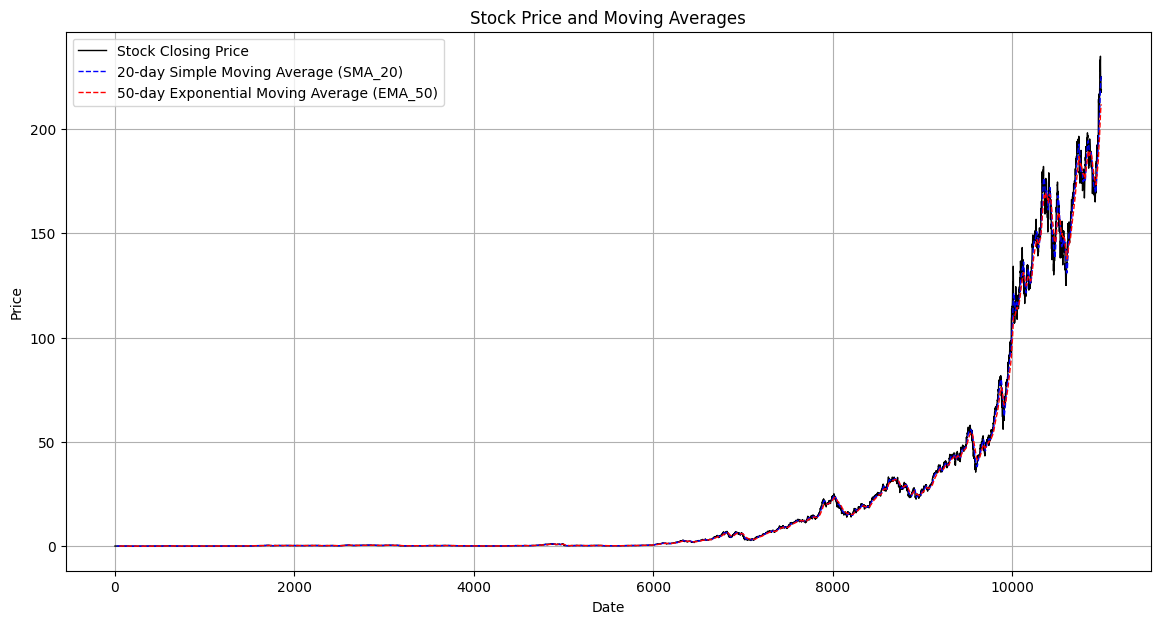

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Stock Closing Price', color='black', linewidth=1)
plt.plot(data['SMA_20'], label='20-day Simple Moving Average (SMA_20)', color='blue', linestyle='--', linewidth=1)
plt.plot(data['EMA_50'], label='50-day Exponential Moving Average (EMA_50)', color='red', linestyle='--', linewidth=1)

plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## **Visualize RSI**

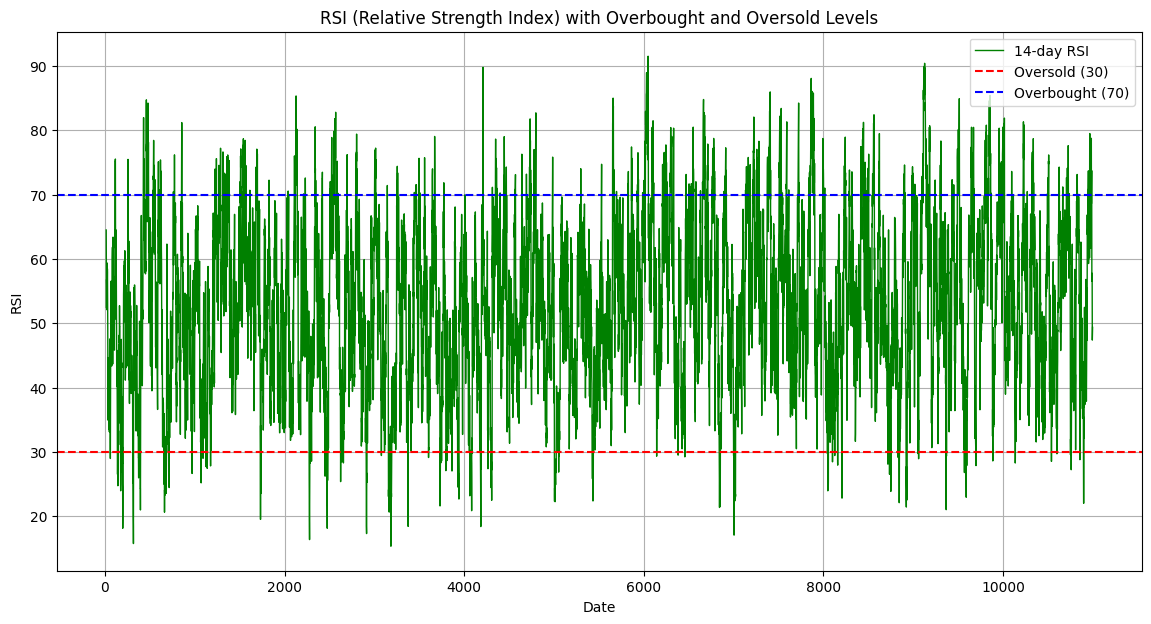

In [43]:
plt.figure(figsize=(14, 7))
plt.plot(data['RSI_14'], label='14-day RSI', color='green', linewidth=1)
plt.axhline(y=30, color='red', linestyle='--', label='Oversold (30)')
plt.axhline(y=70, color='blue', linestyle='--', label='Overbought (70)')

plt.title('RSI (Relative Strength Index) with Overbought and Oversold Levels')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## **Visualize All Indicators Together**

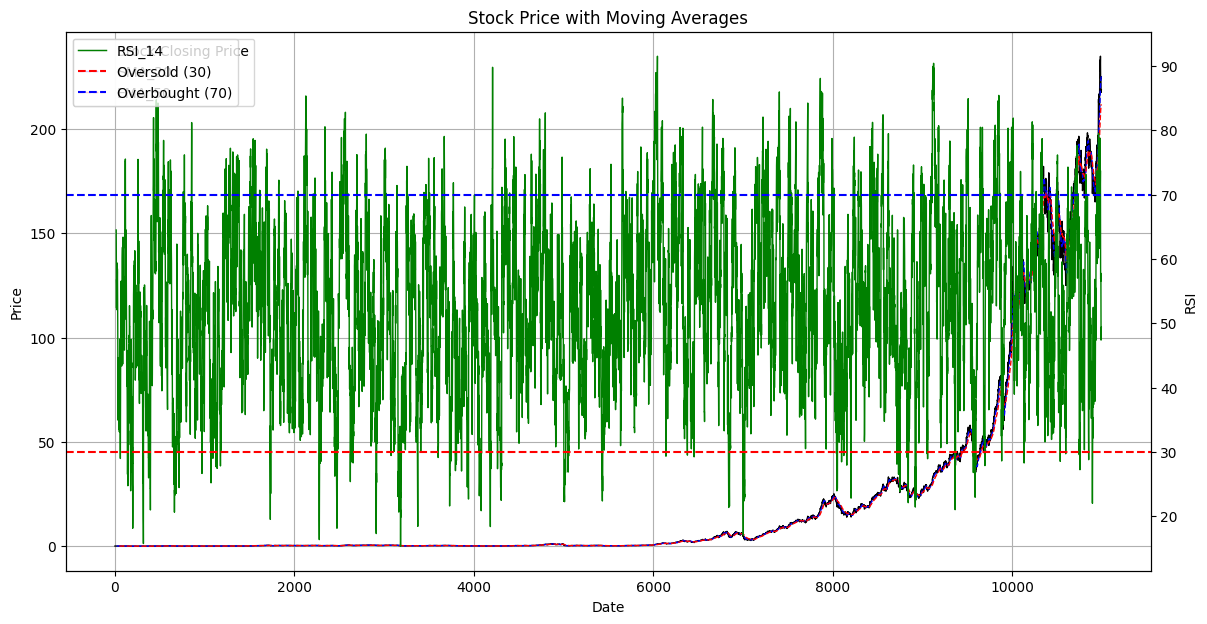

In [46]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the closing price, SMA, and EMA
ax1.plot(data['Close'], label='Stock Closing Price', color='black', linewidth=1)
ax1.plot(data['SMA_20'], label='SMA_20', color='blue', linestyle='--', linewidth=1)
ax1.plot(data['EMA_50'], label='EMA_50', color='red', linestyle='--', linewidth=1)

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Stock Price with Moving Averages')
ax1.legend(loc='best')
ax1.grid(True)

# Create a second axis for RSI
ax2 = ax1.twinx()
ax2.plot(data['RSI_14'], label='RSI_14', color='green', linewidth=1)
ax2.axhline(30, color='red', linestyle='--', label='Oversold (30)')
ax2.axhline(70, color='blue', linestyle='--', label='Overbought (70)')
ax2.set_ylabel('RSI')

ax2.legend(loc='upper left')
plt.show()

### Stock Data Summary:

1. **Close**: The stock's price at the end of the day.
   - Example: **10993** = **218.54**.

2. **SMA_20** (20-Day Simple Moving Average): Average of closing prices over 20 days, smoothing out price fluctuations.
   - Example: **10993** = **224.23**.

3. **EMA_50** (50-Day Exponential Moving Average): Weighted average that reacts more to recent prices than SMA.
   - Example: **10993** = **210.66**.

4. **RSI_14** (14-Day Relative Strength Index): Measures momentum, values between **30-70** indicate neutral trends.
   - Example: **10993** = **48.69** (neutral).

### Insights:
- **SMA_20** and **EMA_50** show a stable trend, slightly below the **Close** price.
- **RSI_14** is neutral, indicating no immediate overbought or oversold conditions.